#**Summary**

The dataset is collected from "*data.mendeley.com*". The dataset is about "*The Impact of Covid-19 Pandemic on the Global Economy: Emphasis on Poverty Alleviation and Economic Growth*". The data here shows us the impact of Covid-19 on the global economy including 210 countries.


The main objective of this analysis is prediction. In this project, we will try different linear regression algorithms to find relationship between common GDP and human development index and total number of death. We will then choose the best candidate algorithm from preliminary results. The goal with this is to create a model that  predicts how the global economy of each country is affected during Covid-19.


---



## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNetCV
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore', module='sklearn')

## Import Data

In [2]:
data = pd.read_excel("data.xlsx")
data

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.00,38928341,1803.987,0.498,NaN,NaN,NaN,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.00,38928341,1803.987,0.498,NaN,NaN,NaN,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.00,38928341,1803.987,0.498,NaN,NaN,NaN,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.00,38928341,1803.987,0.498,NaN,NaN,NaN,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.00,38928341,1803.987,0.498,NaN,NaN,NaN,17.477233,7.497754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,8055.0,231.0,76.85,14862927,1899.775,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
50414,ZWE,Zimbabwe,2020-10-16,8075.0,231.0,76.85,14862927,1899.775,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
50415,ZWE,Zimbabwe,2020-10-17,8099.0,231.0,76.85,14862927,1899.775,0.535,8.999496,5.442418,4.341855,16.514381,7.549491
50416,ZWE,Zimbabwe,2020-10-18,8110.0,231.0,76.85,14862927,1899.775,0.535,9.000853,5.442418,4.341855,16.514381,7.549491


In [3]:
data.shape

(50418, 14)

### **Data Exploration**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 50418 non-null  object 
 1   location                 50418 non-null  object 
 2   date                     50418 non-null  object 
 3   total_cases              47324 non-null  float64
 4   total_deaths             39228 non-null  float64
 5   stringency_index         43292 non-null  float64
 6   population               50418 non-null  int64  
 7   gdp_per_capita           44706 non-null  float64
 8   human_development_index  44216 non-null  float64
 9   Unnamed: 9               46824 non-null  float64
 10  Unnamed: 10              38120 non-null  float64
 11  Unnamed: 11              40376 non-null  float64
 12  Unnamed: 12              50418 non-null  float64
 13  Unnamed: 13              44706 non-null  float64
dtypes: float64(10), int64(

In [5]:
# Let's Check Columns Name
'Columns Name: ' + str(data.columns.tolist())

"Columns Name: ['iso_code', 'location', 'date', 'total_cases', 'total_deaths', 'stringency_index', 'population', 'gdp_per_capita', 'human_development_index', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']"

In [6]:
# Let's Find Number of Countries
'Number of countries: ' + str(data['location'].nunique())

'Number of countries: 210'

In [7]:
# Let's Find Columns and Missing Values in it
print('Number of missing values: \n' + str(data.isnull().sum()))

Number of missing values: 
iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
Unnamed: 9                  3594
Unnamed: 10                12298
Unnamed: 11                10042
Unnamed: 12                    0
Unnamed: 13                 5712
dtype: int64


### **Let's get understanding of features**

iso_code = Country Code

location = Country Name

date = Date

total_cases = Number of Covid-19 cases

total_deaths = Number of deaths by Covid-19

stringency_index = The Stringency Index provides a computable parameter to evaluate the effectiveness of the nationwide lockdown. It is used by the Oxford COVID-19 Government Response Tracker with a database of 17 indicators of government response such as school and workplace closings, public events, public transport, stay-at-home policies. The Stringency Index is a number from 0 to 100 that reflects these indicators. A higher index score indicates a higher level of stringency.

population = Population of the country

gdp_per_capita = A country's GDP or gross domestic product is calculated by taking into account the monetary worth of a nation's goods and services after a certain period of time, usually one year. It's a measure of economic activity.

human_development_index = The Human Development Index (HDI) was created to emphasize that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone. The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.


### **Data Preparation**

The following columns are unnamed and have high missing value so they are not much needed. Besides that there are some more columns which has missing values. Let's drop those columns.

In [8]:
data = data.drop(['iso_code', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis = 1)

In [9]:
data = data.dropna(axis=0)
data.isnull().sum()

location                   0
date                       0
total_cases                0
total_deaths               0
stringency_index           0
population                 0
gdp_per_capita             0
human_development_index    0
dtype: int64

This shows all missing values are removed and now we have clean data.

In [10]:
len(data)

31518

### Let's look at the correlation coefficient. A coefficient close to 1 means that there’s a very strong positive correlation between the two variables. The diagonal line is the correlation of the variables to themselves, that's why they are 1. 
Let's find how much and which features of our data correlated.


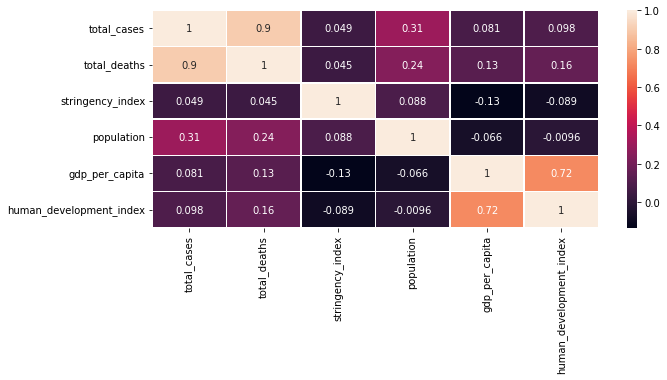

In [11]:
correlation = data.corr(method='pearson')
fig = plt.subplots(figsize = (10, 4))
sns.heatmap(correlation, 
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            cmap='rocket',
            annot=True,
            linewidth=0.5)

Here we can see that the Human Development Index (HDI) is strongly correlated to the GDP per Capita and total case to deaths. The population also has a strong correlation to the number of total cases and deaths. This is what we expected. A high population will have a higher number of cases and deaths. What we are looking for is the relationship between GDP per capita(or HDI) and total number of cases or deaths.

(array([14775.,  6275.,  4216.,  3536.,   875.,  1012.,   204.,   208.,
          219.,   198.]),
 array([   661.24 ,  12288.676,  23916.112,  35543.548,  47170.984,
         58798.42 ,  70425.856,  82053.292,  93680.728, 105308.164,
        116935.6  ]),
 <a list of 10 Patch objects>)

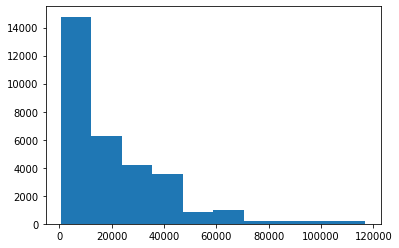

In [12]:
plt.hist(data['gdp_per_capita'])

(array([3.0978e+04, 2.4000e+02, 6.6000e+01, 4.6000e+01, 4.3000e+01,
        4.2000e+01, 2.4000e+01, 2.8000e+01, 3.1000e+01, 2.0000e+01]),
 array([      0. ,  776254.4, 1552508.8, 2328763.2, 3105017.6, 3881272. ,
        4657526.4, 5433780.8, 6210035.2, 6986289.6, 7762544. ]),
 <a list of 10 Patch objects>)

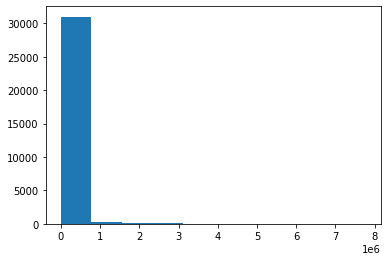

In [13]:
plt.hist(data['total_cases'])

(array([3.0146e+04, 9.5700e+02, 9.1000e+01, 9.1000e+01, 6.2000e+01,
        5.8000e+01, 3.8000e+01, 2.0000e+01, 2.5000e+01, 3.0000e+01]),
 array([     0. ,  21477.1,  42954.2,  64431.3,  85908.4, 107385.5,
        128862.6, 150339.7, 171816.8, 193293.9, 214771. ]),
 <a list of 10 Patch objects>)

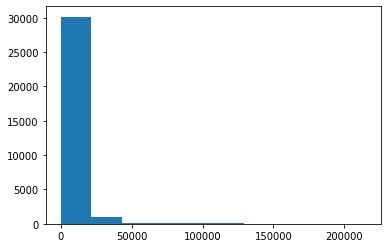

In [14]:
plt.hist(data['total_deaths'])

In [15]:
# Log Transforming the skewed features

gdp_trans = data['gdp_per_capita'].apply(lambda x: np.log1p(x))
total_deaths_trans = data['total_deaths'].apply(lambda x: np.log1p(x))
total_cases_trans = data['total_cases'].apply(lambda x: np.log1p(x))

Text(0, 0.5, 'GDP per capita')

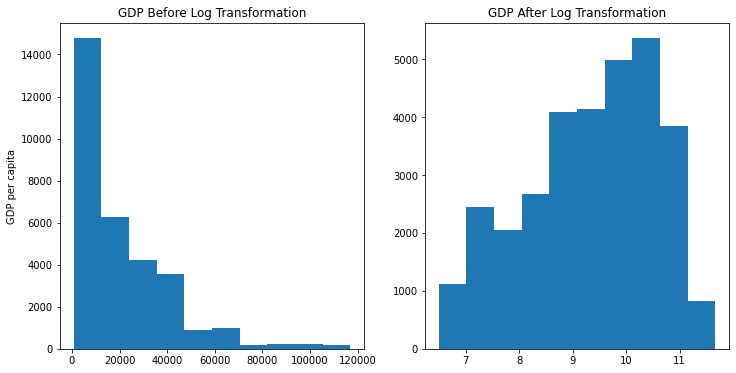

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.hist(data['gdp_per_capita'])
ax2.hist(gdp_trans)
ax1.set_title('GDP Before Log Transformation')
ax2.set_title('GDP After Log Transformation')
ax1.set_ylabel('GDP per capita')

Text(0, 0.5, 'Total Deaths')

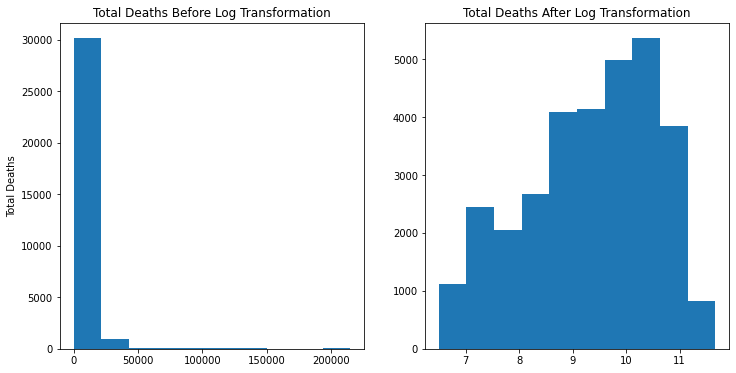

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.hist(data['total_deaths'])
ax2.hist(gdp_trans)
ax1.set_title('Total Deaths Before Log Transformation')
ax2.set_title('Total Deaths After Log Transformation')
ax1.set_ylabel('Total Deaths')

Text(0, 0.5, 'Total Cases')

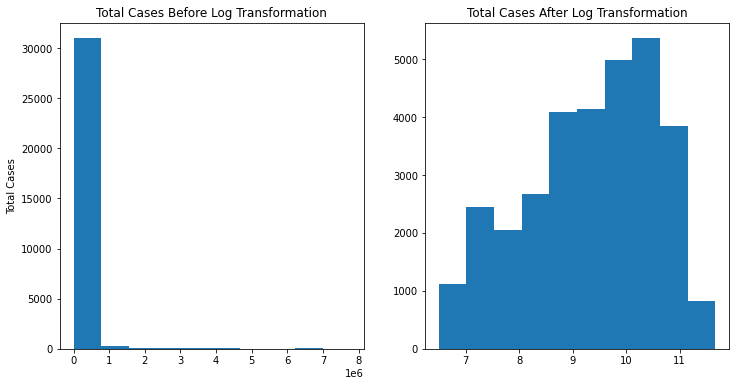

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.hist(data['total_cases'])
ax2.hist(gdp_trans)
ax1.set_title('Total Cases Before Log Transformation')
ax2.set_title('Total Cases After Log Transformation')
ax1.set_ylabel('Total Cases')

Let's apply Scaling to Normalized features. This ensures that each feature is treated equally when applying supervised learners.

In [19]:
data['total_cases'] = total_cases_trans
data['total_deaths'] = total_deaths_trans
data['gdp_per_capita'] = gdp_trans
data.head()

,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,7.498309,0.498
1,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,7.498309,0.498
2,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,7.498309,0.498
3,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,7.498309,0.498
4,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,7.498309,0.498


In [20]:
mmScaler = MinMaxScaler()
norm_feature = ['total_cases', 'total_deaths', 'gdp_per_capita']
features_mm_scaled = pd.DataFrame(data = data)
features_mm_scaled[norm_feature] = mmScaler.fit_transform(data[norm_feature])
features_mm_scaled

,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,Afghanistan,2019-12-31,0.000000,0.000000,0.00,38928341,0.193801,0.498
1,Afghanistan,2020-01-01,0.000000,0.000000,0.00,38928341,0.193801,0.498
2,Afghanistan,2020-01-02,0.000000,0.000000,0.00,38928341,0.193801,0.498
3,Afghanistan,2020-01-03,0.000000,0.000000,0.00,38928341,0.193801,0.498
4,Afghanistan,2020-01-04,0.000000,0.000000,0.00,38928341,0.193801,0.498
...,...,...,...,...,...,...,...,...
50413,Zimbabwe,2020-10-15,0.566926,0.443642,76.85,14862927,0.203796,0.535
50414,Zimbabwe,2020-10-16,0.567082,0.443642,76.85,14862927,0.203796,0.535
50415,Zimbabwe,2020-10-17,0.567269,0.443642,76.85,14862927,0.203796,0.535
50416,Zimbabwe,2020-10-18,0.567354,0.443642,76.85,14862927,0.203796,0.535


### **Train Test Split**

In [21]:
X= features_mm_scaled[['total_cases', 'total_deaths', 'stringency_index', 'population', 'human_development_index']]
y = features_mm_scaled['gdp_per_capita']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

print(f'The train set size is {X_train.shape[0]}.')
print(f'The test set size is {X_test.shape[0]}.')

The train set size is 22062.
The test set size is 9456.


### **Training Models**

In [23]:
kf = KFold(shuffle=True, random_state=841, n_splits=4)

**Training by Simple Linear Model**

In [24]:
ss = StandardScaler()
lin_reg = LinearRegression()

X_train_ss = ss.fit_transform(X_train)
lin_reg.fit(X_train_ss, y_train)
X_test = ss.transform(X_test)
y_pred = lin_reg.predict(X_test)
linear_score = r2_score(y_test.values, y_pred)


estimator = Pipeline([("scaler", ss),("regression", lin_reg)])
predictions_lr = cross_val_predict(estimator, X_train, y_train, cv=kf)
kf_lin_score = r2_score(y_train, predictions_lr)

print(f'The simple linear score is {linear_score} and linear score with K-Fold Cross Validation is {kf_lin_score}')

The simple linear score is 0.8068327858597878 and linear score with K-Fold Cross Validation is 0.7978374528951341


R2 score for simple Linear Model and Linear Model with K-Fold Cross Validation in almost equal.

**Training by Lasso Regression with K-Fold Cross Validation**

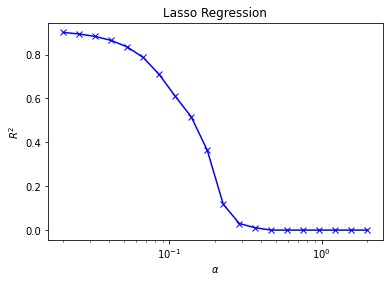

In [35]:
ss = StandardScaler()
poly_feat = PolynomialFeatures(degree=4)
scores = []
alphas = np.geomspace(0.02, 2.0, 20)
pred_lasso = []

for alpha in alphas:
  las = Lasso(alpha=alpha, max_iter= 100000)

  estimator = Pipeline([
      ('scaler',ss),
      ('poly_feat', poly_feat),
      ('lasso_regression', las)])
  
  pred_lasso = cross_val_predict(estimator, X_train, y_train, cv=kf)

  las_score = r2_score(y_train, pred_lasso)

  scores.append(las_score)


plt.semilogx(alphas, scores, '-x', color='blue')
plt.title('Lasso Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [25]:
best_estimator = Pipeline([
                    ("scaler", ss),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.02))])

best_estimator.fit(X_train, y_train)
lasso_score = best_estimator.score(X_train, y_train)
lasso_score

0.8587670176876119

**Training by Ridge Regression with K-Fold Cross Validation**

Text(0, 0.5, '$R^2$')

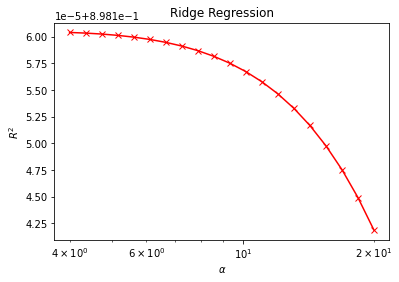

In [26]:
poly_feat = PolynomialFeatures(degree=2)
scores = []
alphas = np.geomspace(4, 20, 20)
pred_rr = []

for alpha in alphas:
  ridge = Ridge(alpha=alpha, max_iter= 100000)

  estimator = Pipeline([
      ('scaler',ss),
      ('poly_feat', poly_feat),
      ('ridge_regression', ridge)])
  
  pred_rr = cross_val_predict(estimator, X_train, y_train, cv=kf)

  rr_score = r2_score(y_train, pred_rr)

  scores.append(rr_score)


plt.semilogx(alphas, scores, '-x', color='red')
plt.title('Ridge Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$')

In [27]:
best_estimator = Pipeline([
                    ("scaler", ss),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("ridge_regression", Ridge(alpha=0.03))])

best_estimator.fit(X_train, y_train)
ridge_score = best_estimator.score(X_train, y_train)
ridge_score

0.8983600240088313

### **Compare R2 Score of all models.**

In [28]:
pd.DataFrame([[linear_score, lasso_score, ridge_score]],columns=['linear', 'lasso', 'ridge'], index=['score'])

,linear,lasso,ridge
score,0.806833,0.858767,0.89836


Both Lasso and Ridge with correct hyperparameter tuning gives better result than Simple Linear Regression.

**Finding Root Mean Scored Error of all models**

In [29]:
# Define Root Mean Squared Error Function
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [30]:
# Fit a basic linear regression model
linReg = LinearRegression()
linReg.fit(X_train, y_train)
linRegPred = linReg.predict(X_test)
linReg_rmse = rmse(y_test, linRegPred)

In [31]:
# Fit a regular (non-cross validated) Ridge model
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
ridgeCV = RidgeCV(alphas=alphas, cv=4)
ridgeCV.fit(X_train, y_train)
ridgeCVPred = ridgeCV.predict(X_test)
ridgeCV_rmse = rmse(y_test, ridgeCVPred)

In [32]:
# Fit a Lasso model using cross validation and determine the optimum value for 𝛼
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])
lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3)
lassoCV.fit(X_train, y_train)
lassoCVPred = lassoCV.predict(X_test)
lassoCV_rmse = rmse(y_test, lassoCVPred)

In [33]:
# Fit elastic net with the same set of alphas as lasso
l1_ratios = np.linspace(0.1, 0.9, 9)
elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4)
elasticNetCV.fit(X_train, y_train)
elasticNetCVPred = elasticNetCV.predict(X_test)
elasticNetCV_rmse = rmse(y_test, elasticNetCVPred)

In [34]:
rmse_vals = [linReg_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

# labels = ['Linear', 'Lasso', 'Ridge' 'ElasticNet']

rmse_df = pd.DataFrame([[linReg_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]],columns=['Linear', 'Lasso', 'Ridge', 'ElasticNet'], index=['rmse'])
rmse_df

,Linear,Lasso,Ridge,ElasticNet
rmse,1.396161,1.395354,1.395129,1.395524


## **Conclusion**

Ridge gives the smallest Root-mean-square error however, the difference in scores and errors are not significant and almost identical. The best candidate based on Root-mean-square error and score results is Ridge Regression, therefore we recommend RidgeCV as a final model that best fits the data in terms of accuracy.

## **Next Steps**

We could further try optimize Ridge using GridSearchCV.

To predict the effect on GDP for an individual country, we could one-hot encode the location or iso_code columns and use that for training our models. Perhaps collecting more frequent records on specific countries would help achieve more accurate results.